In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# hello world
data = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def calculate_woe(df, feature, y):
    ''' calculates WoE and IV for each feature '''
    df = pd.concat([df[feature], y], axis=1)
    target = df.columns.values[1]
    
    # calculate number of occurences of the given bin (support)
    support = df.groupby(feature, as_index=False)[target].count()
    # calculate the proportion of positive occurences 
    n_pos = df.groupby(feature, as_index = False)[target].mean()
    # get dataframe of (binned_feature, support, n_pos)
    df = pd.concat([support, n_pos], axis=1).iloc[:, [0, 1, 3]]
    df.columns = [feature, 'support', 'pos%']
    # count of positive/negative occurences
    positive = df['pos%'] * df['support']
    negative = (1 - df['pos%']) * df['support']
    # calculate what percentage of total positives/negatives given feature bin has
    pos = positive / positive.sum(); neg = negative / negative.sum()
    # finally calculate WoE and sort dataframe by WoE for plotting
    df['WoE'] = np.log(pos / neg)
    df = df.sort_values(['WoE']).reset_index(drop=True)
    # calculate IV using WoE
    df['IV'] = abs(((pos - neg) * df['WoE']).sum())
    return df

def plot_woe(df):
    ''' plots support, WoE and IV of each feature '''
    plt.figure(figsize=(10, 5))
    plt.plot(df.iloc[:, 0].astype(str), df['WoE'], marker = 'o', color='black')
    plt.xlabel(df.columns[0])
    plt.ylabel('WoE')

In [4]:
# preprocess the target column
''' 
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
'''

# following features will be labeled `0` to indicate "bad" loans
data['loan_status'] = data['loan_status'].replace(['Charged Off', 'Late (31-120 days)', 'Default',
                                                  'Does not meet the credit policy. Status:Charged Off'], 0)
# following features will be labeled `1` to indicate "good" loans
data['loan_status'] = data['loan_status'].replace(['Current', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)',
                                                  'Does not meet the credit policy. Status:Fully Paid'], 1)

## Data Preprocessing

In [5]:
X_woe = pd.DataFrame()

### loan_amnt

,loan_amnt,support,pos%,WoE,IV
0,"(20000.0, 35000.0]",97758,0.884337,-0.063688,0.001856
1,"(12000.0, 20000.0]",134488,0.889090,-0.016360,0.001856
2,"(8000.0, 12000.0]",108713,0.892166,0.015211,0.001856
3,"(499.999, 8000.0]",125326,0.896095,0.056725,0.001856


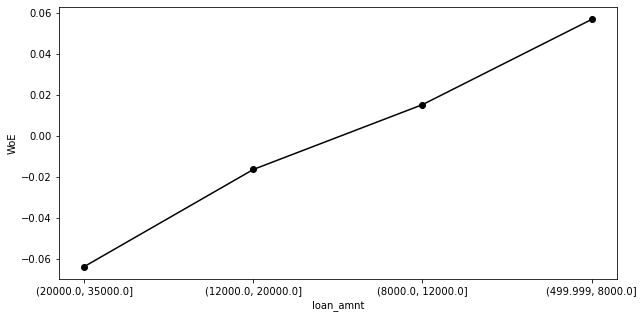

In [6]:
X_woe['loan_amnt'] = pd.qcut(data['loan_amnt'], 4)
df_temp = calculate_woe(X_woe, 'loan_amnt', data['loan_status'])
plot_woe(df_temp)
df_temp

### funded_amnt

,funded_amnt,support,pos%,WoE,IV
0,"(20000.0, 35000.0]",97239,0.884882,-0.058352,0.001663
1,"(12000.0, 20000.0]",134579,0.888957,-0.017709,0.001663
2,"(8000.0, 12000.0]",108880,0.891927,0.012732,0.001663
3,"(499.999, 8000.0]",125587,0.895984,0.055539,0.001663


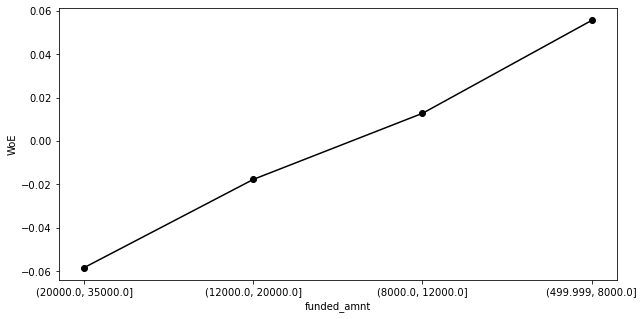

In [7]:
X_woe['funded_amnt'] = pd.qcut(data['funded_amnt'], 4)
df_temp = calculate_woe(X_woe, 'funded_amnt', data['loan_status'])
plot_woe(df_temp)
df_temp

### funded_amnt_inv

,funded_amnt_inv,support,pos%,WoE,IV
0,"(23333.333, 35000.0]",74892,0.887785,-0.029530,0.000162
1,"(11666.667, 23333.333]",183004,0.890877,0.001884,0.000162
2,"(-35.0, 11666.667]",208389,0.891578,0.009115,0.000162


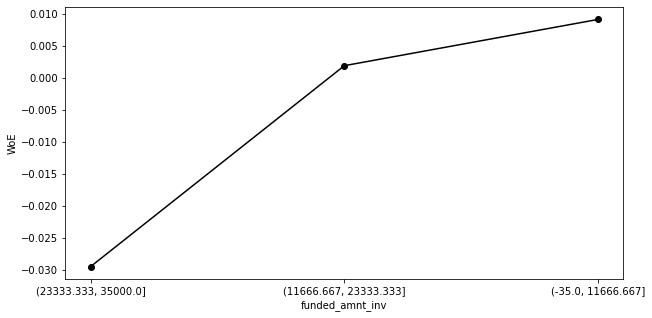

In [8]:
X_woe['funded_amnt_inv'] = pd.cut(data['funded_amnt_inv'], 3)
df_temp = calculate_woe(X_woe, 'funded_amnt_inv', data['loan_status'])
plot_woe(df_temp)
df_temp

### term

,term,support,pos%,WoE,IV
0,60 months,128332,0.858508,-0.294894,0.03886
1,36 months,337953,0.902915,0.132203,0.03886


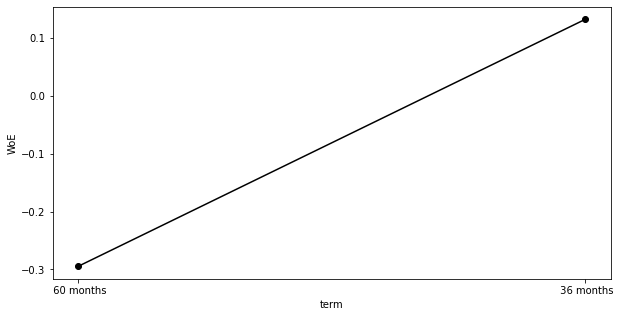

In [9]:
df_temp = calculate_woe(data, 'term', data['loan_status'])
plot_woe(df_temp)
df_temp

### int_rate

,int_rate,support,pos%,WoE,IV
0,"(19.18, 26.06]",54591,0.792603,-0.757155,0.221917
1,"(12.3, 19.18]",239482,0.875431,-0.147986,0.221917
2,"(5.399, 12.3]",172212,0.943012,0.708396,0.221917


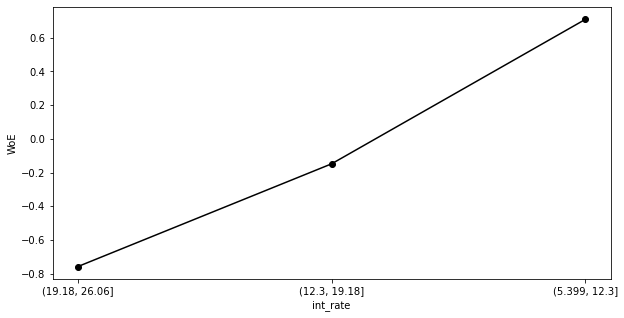

In [10]:
X_woe['int_rate'] = pd.cut(data['int_rate'], 3)
df_temp = calculate_woe(X_woe, 'int_rate', data['loan_status'])
plot_woe(df_temp)
df_temp

### installment

,installment,support,pos%,WoE,IV
0,"(495.35, 1409.99]",155425,0.885057,-0.056627,0.002326
1,"(300.39, 495.35]",155363,0.890463,-0.002365,0.002326
2,"(15.669, 300.39]",155497,0.896557,0.061702,0.002326


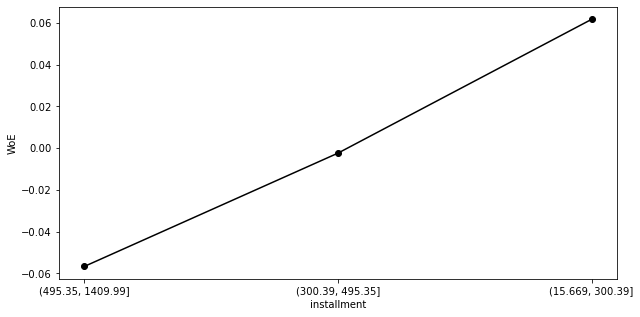

In [11]:
X_woe['installment'] = pd.qcut(data['installment'], 3)
df_temp = calculate_woe(X_woe, 'installment', data['loan_status'])
plot_woe(df_temp)
df_temp

### grade

,grade,support,pos%,WoE,IV
0,G,3322,0.721854,-1.144166,0.205307
1,F,13229,0.758712,-0.952214,0.205307
2,E,35757,0.805241,-0.678466,0.205307
3,D,76888,0.845906,-0.395001,0.205307
4,C,125293,0.885197,-0.055251,0.205307
5,B,136929,0.921426,0.364043,0.205307
6,A,74867,0.961305,1.114730,0.205307


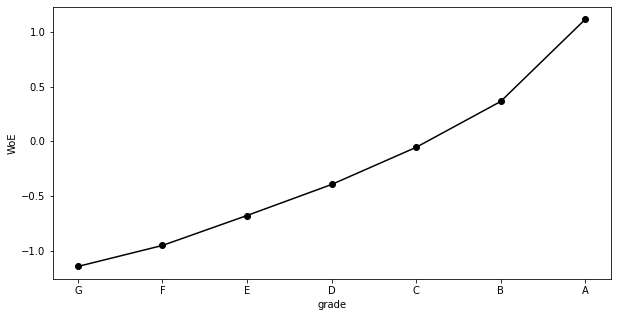

In [12]:
df_temp = calculate_woe(data, 'grade', data['loan_status'])
plot_woe(df_temp)
df_temp

### sub_grade

,sub_grade,support,pos%,WoE,IV
0,G1,1109,0.706943,-1.217260,0.211104
1,F5,1513,0.708526,-1.209608,0.211104
2,G5,385,0.711688,-1.194246,0.211104
3,G3,583,0.715266,-1.176746,0.211104
4,G2,823,0.736330,-1.070861,0.211104
5,F4,2067,0.745041,-1.025507,0.211104
6,F3,2708,0.750739,-0.995289,0.211104
7,G4,422,0.751185,-0.992903,0.211104
8,F2,3001,0.768411,-0.898486,0.211104
9,E5,5087,0.780224,-0.830871,0.211104


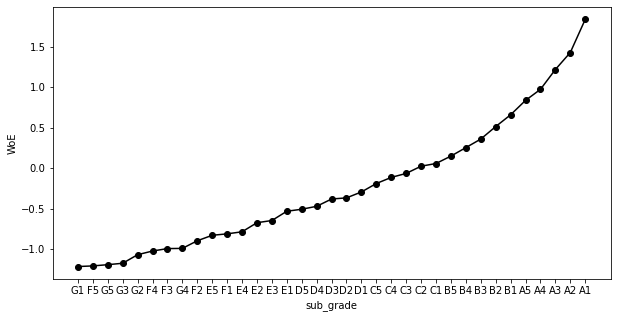

In [13]:
df_temp = calculate_woe(data, 'sub_grade', data['loan_status'])
plot_woe(df_temp)
df_temp

,sub_grade,support,pos%,WoE,IV
0,"(-0.001, 14.0]",52308,0.788178,-0.783868,0.304499
1,"(14.0, 18.0]",57627,0.841706,-0.426866,0.304499
2,"(18.0, 20.0]",41439,0.865006,-0.240335,0.304499
3,"(20.0, 22.0]",49422,0.881591,-0.090259,0.304499
4,"(22.0, 24.0]",53693,0.894511,0.039831,0.304499
5,"(24.0, 26.0]",55757,0.909070,0.204485,0.304499
6,"(26.0, 27.0]",31686,0.921038,0.358686,0.304499
7,"(27.0, 29.0]",49486,0.935598,0.578196,0.304499
8,"(29.0, 31.0]",40802,0.952404,0.898403,0.304499
9,"(31.0, 34.0]",34065,0.971965,1.448035,0.304499


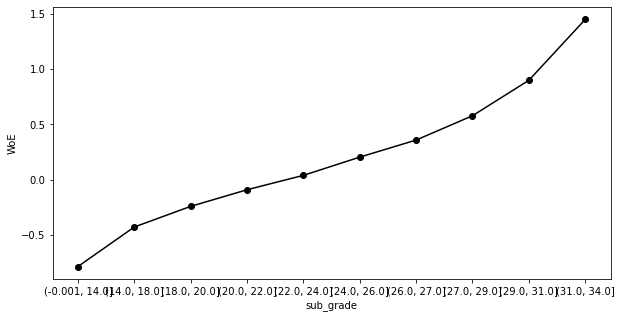

In [14]:
# since grades are ordinal data (we can compare them), its best to use a label encoder here. Otherwise we have too many features
grades = list(data['sub_grade'].unique())
grades.sort(reverse=True) # sorts grades as [G5, G4, ... A2, A1]
grades_map = dict(zip(grades, list(range(len(grades))))) # get dict of corresponding indices
data['sub_grade'] = data['sub_grade'].apply(lambda x: grades_map[x])
# plot the results
X_woe['sub_grade'] = pd.qcut(data['sub_grade'], 10)
df_temp = calculate_woe(X_woe, 'sub_grade', data['loan_status'])
plot_woe(df_temp)
df_temp

We have effectively reduced number of features from 35 to 10 while also increasing the IV

### emp_length

In [15]:
print(data['emp_length'].value_counts())
print(data['emp_length'].isnull().sum())

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64
21008


In [16]:
# lots of nan, best strategy would be to make it a separate category
data['emp_length'] = data['emp_length'].fillna('NaN')

,emp_length,support,pos%,WoE,IV
0,NaN,21008,0.867384,-0.219821,0.003532
1,< 1 year,36265,0.881015,-0.095769,0.003532
2,6 years,26112,0.882889,-0.077766,0.003532
3,5 years,30774,0.885033,-0.056866,0.003532
4,9 years,17888,0.887914,-0.028239,0.003532
5,1 year,29622,0.888124,-0.026127,0.003532
6,7 years,26180,0.888655,-0.020764,0.003532
7,8 years,22395,0.889931,-0.007810,0.003532
8,2 years,41373,0.890242,-0.004624,0.003532
9,4 years,28023,0.890411,-0.002893,0.003532


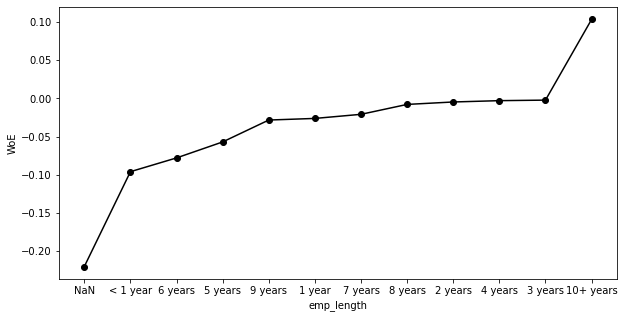

In [17]:
df_temp = calculate_woe(data, 'emp_length', data['loan_status'])
plot_woe(df_temp)
df_temp

In [18]:
# again, we have an ordinal feature, best to label encode it
emp_len = ['NaN', '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
           '6 years', '7 years', '8 years', '9 years', '10+ years']
emp_len_map = dict(zip(emp_len, range(len(emp_len))))
data['emp_length'] = data['emp_length'].apply(lambda x: emp_len_map[x])

,emp_length,support,pos%,WoE,IV
0,"(-0.011, 2.75]",86895,0.880143,-0.104062,0.004514
1,"(5.5, 8.25]",83066,0.885501,-0.052260,0.004514
2,"(2.75, 5.5]",105992,0.890369,-0.003327,0.004514
3,"(8.25, 11.0]",190332,0.897957,0.076887,0.004514


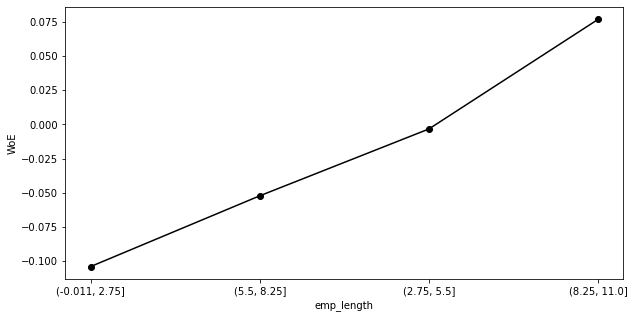

In [19]:
# plot the results
X_woe['emp_length'] = pd.cut(data['emp_length'], 4)
df_temp = calculate_woe(X_woe, 'emp_length', data['loan_status'])
plot_woe(df_temp)
df_temp

### home_ownership

In [20]:
print(data['home_ownership'].value_counts())
print(data['home_ownership'].isnull().sum())

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64
0


,home_ownership,support,pos%,WoE,IV
0,RENT,188473,0.873897,-0.161980,0.021149
1,OWN,41704,0.891737,0.010764,0.021149
2,MORTGAGE,236108,0.903917,0.143679,0.021149


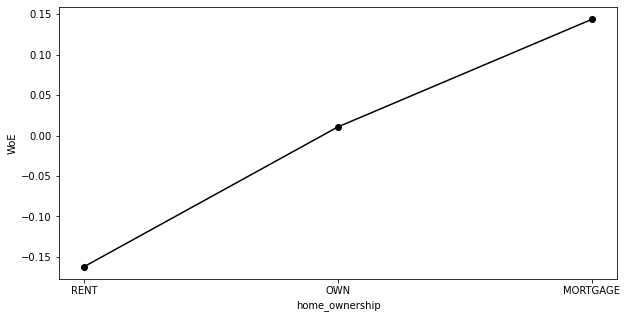

In [21]:
# features ANY/NONE/OTHER contain too few samples, therefore we aggregate them with mode - MORTGAGE
data['home_ownership'] = data['home_ownership'].replace(['ANY', 'NONE', 'OTHER'], 'MORTGAGE')
df_temp = calculate_woe(data, 'home_ownership', data['loan_status'])
plot_woe(df_temp)
df_temp

### annual_inc

In [22]:
print(data['annual_inc'].describe())
print(data['annual_inc'].isnull().sum())

count    4.662810e+05
mean     7.327738e+04
std      5.496357e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.896000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64
4


,annual_inc,support,pos%,WoE,IV
0,"(1895.999, 50000.0]",157715,0.865390,-0.237035,0.047585
1,"(50000.0, 78000.0]",153609,0.890404,-0.002965,0.047585
2,"(78000.0, 7500000.0]",154957,0.916732,0.300913,0.047585


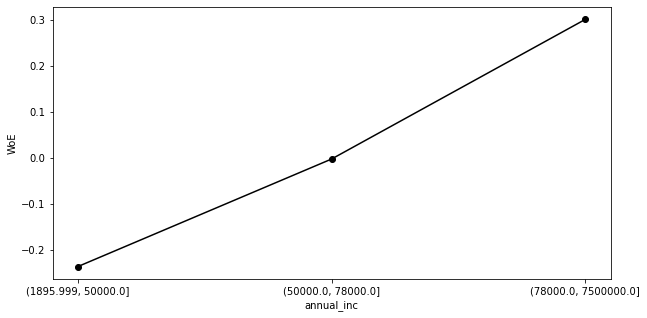

In [23]:
X_woe['annual_inc'] = pd.qcut(data['annual_inc'], 3)
df_temp = calculate_woe(X_woe, 'annual_inc', data['loan_status'])
plot_woe(df_temp)
df_temp

### verification_status

,verification_status,support,pos%,WoE,IV
0,Verified,168055,0.872631,-0.173420,0.018854
1,Source Verified,149993,0.895882,0.054438,0.018854
2,Not Verified,148237,0.905921,0.166972,0.018854


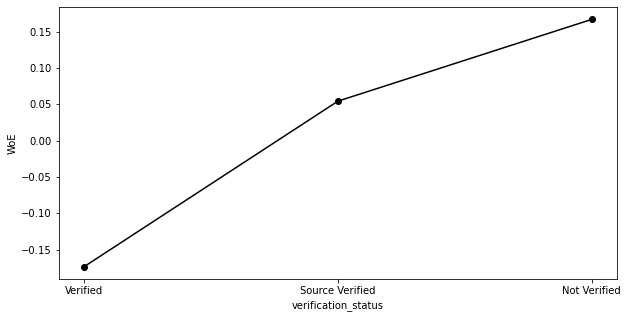

In [24]:
df_temp = calculate_woe(data, 'verification_status', data['loan_status'])
plot_woe(df_temp)
df_temp

### issue_d

In [25]:
# based on domain knowledge, its best to omit this feature, banks to not give any preference to any specific issue dates
print(data['issue_d'].describe())
print(data['issue_d'].isnull().sum())

count     466285
unique        91
top       Oct-14
freq       38782
Name: issue_d, dtype: object
0


### pymnt_plan

In [26]:
# omit this feature, features with value `y` are encountered very rarely
print(data['pymnt_plan'].value_counts())
print(data['pymnt_plan'].isnull().sum())

n    466276
y         9
Name: pymnt_plan, dtype: int64
0


### purpose

,purpose,support,pos%,WoE,IV
0,small_business,7013,0.784258,-0.807190,0.036295
1,educational,422,0.791469,-0.764040,0.036295
2,renewable_energy,351,0.846154,-0.393096,0.036295
3,moving,2994,0.847361,-0.383790,0.036295
4,house,2269,0.859850,-0.283798,0.036295
5,other,23690,0.862009,-0.265764,0.036295
6,medical,4602,0.866145,-0.230548,0.036295
7,wedding,2343,0.878361,-0.120843,0.036295
8,vacation,2487,0.882187,-0.084535,0.036295
9,debt_consolidation,274195,0.886690,-0.040475,0.036295


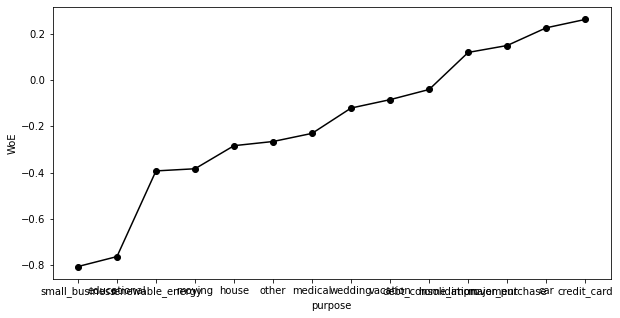

In [27]:
df_temp = calculate_woe(data, 'purpose', data['loan_status'])
plot_woe(df_temp)
df_temp

-----------------------------------------------------------------------

In [28]:
#function to print all the columns
def printcolumns():
    for col in data:
        print(col)
printcolumns()

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m


# title

In [29]:
print(data['title'].value_counts())
print(data['title'].isnull().sum())

Debt consolidation                         164075
Credit card refinancing                     62275
Debt Consolidation                          15760
Home improvement                            14849
Other                                       12713
                                            ...  
Moving/Appartment Loan                          1
Loan to consolidate higher interst debt         1
Dartmouth Fund                                  1
Credit Card - Tuition consolidation             1
refinance key bank                              1
Name: title, Length: 63098, dtype: int64
20


In [30]:
data['title'].describe()

count                 466265
unique                 63098
top       Debt consolidation
freq                  164075
Name: title, dtype: object

# zip_code

In [31]:
print(data['zip_code'].value_counts())
print(data['zip_code'].isnull().sum())

945xx    5304
112xx    5102
750xx    5013
606xx    4696
100xx    4391
         ... 
938xx       1
375xx       1
861xx       1
522xx       1
682xx       1
Name: zip_code, Length: 888, dtype: int64
0


# addr_state 

In [32]:
print(data['addr_state'].value_counts())
print(data['addr_state'].isnull().sum())

CA    71450
NY    40242
TX    36439
FL    31637
IL    18612
NJ    18061
PA    16424
OH    15237
GA    14975
VA    14222
NC    12682
MI    11549
MA    11072
MD    10974
AZ    10712
WA    10517
CO     9739
MN     8158
MO     7508
CT     7204
IN     6525
NV     6519
TN     5984
OR     5949
WI     5911
AL     5853
SC     5583
LA     5489
KY     4438
KS     4190
OK     4117
AR     3488
UT     3428
NM     2588
HI     2487
WV     2412
NH     2232
RI     2050
DC     1426
MT     1396
DE     1272
AK     1251
MS     1226
WY     1128
SD      980
VT      905
IA       14
NE       14
ID       12
ME        4
Name: addr_state, dtype: int64
0


# dti

In [33]:
print(data['dti'].value_counts())
print(data['dti'].isnull().sum())

14.40    410
19.20    381
12.00    369
16.80    368
18.00    365
        ... 
37.61      2
38.95      1
39.14      1
39.94      1
35.54      1
Name: dti, Length: 3997, dtype: int64
0


# deling_2yrs

In [34]:
print(data['delinq_2yrs'].value_counts())
print(data['delinq_2yrs'].isnull().sum())

0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
19.0         3
17.0         3
21.0         2
22.0         2
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64
29


# earliest_cr_line

In [35]:
print(data['earliest_cr_line'].value_counts())
print(data['earliest_cr_line'].isnull().sum())

Oct-00    3674
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Nov-50       1
May-60       1
Feb-60       1
Feb-61       1
Dec-51       1
Name: earliest_cr_line, Length: 664, dtype: int64
29


# inq_last_6mths

In [36]:
print(data['inq_last_6mths'].value_counts())
print(data['inq_last_6mths'].isnull().sum())

0.0     241498
1.0     130148
2.0      57825
3.0      25126
4.0       7241
5.0       2768
6.0       1188
7.0        195
8.0        122
9.0         50
10.0        24
12.0        15
11.0        15
15.0         9
14.0         6
13.0         6
18.0         4
16.0         3
19.0         2
17.0         2
24.0         2
28.0         1
31.0         1
32.0         1
25.0         1
33.0         1
20.0         1
27.0         1
Name: inq_last_6mths, dtype: int64
29


# mths_since_last_delinq

In [37]:
print(data['mths_since_last_delinq'].value_counts())
print(data['mths_since_last_delinq'].isnull().sum())

9.0      4358
8.0      4272
13.0     4260
12.0     4193
10.0     4146
         ... 
121.0       1
156.0       1
159.0       1
108.0       1
127.0       1
Name: mths_since_last_delinq, Length: 145, dtype: int64
250351


# mths_since_last_record

In [38]:
print(data['mths_since_last_record'].value_counts())
print(data['mths_since_last_record'].isnull().sum())

0.0      1278
109.0    1098
108.0     999
106.0     968
104.0     953
         ... 
1.0        28
2.0        24
121.0       2
120.0       2
129.0       1
Name: mths_since_last_record, Length: 123, dtype: int64
403647


# open_acc

In [39]:
print(data['open_acc'].value_counts())
print(data['open_acc'].isnull().sum())

9.0     44019
10.0    42512
8.0     41893
11.0    39112
7.0     37602
        ...  
55.0        2
84.0        1
75.0        1
62.0        1
61.0        1
Name: open_acc, Length: 62, dtype: int64
29


# pub_rec

In [40]:
print(data['pub_rec'].value_counts())
print(data['pub_rec'].isnull().sum())

0.0     404893
1.0      53051
2.0       5624
3.0       1611
4.0        520
5.0        276
6.0        136
7.0         62
8.0         29
9.0         16
10.0        13
11.0         8
12.0         2
18.0         2
13.0         2
17.0         1
16.0         1
40.0         1
21.0         1
49.0         1
19.0         1
54.0         1
14.0         1
34.0         1
15.0         1
63.0         1
Name: pub_rec, dtype: int64
29


### revol_bal

In [41]:
print(data['revol_bal'].value_counts())
print(data['revol_bal'].isnull().sum())

0        2269
6052       40
8696       39
5365       39
6223       39
         ... 
45384       1
47433       1
41290       1
64930       1
50897       1
Name: revol_bal, Length: 58142, dtype: int64
0


### revol_util

In [42]:
print(data['revol_util'].value_counts())
print(data['revol_util'].isnull().sum())

0.00      2284
58.00      864
53.00      850
59.00      845
61.00      832
          ... 
24.89        1
115.30       1
118.00       1
8.58         1
10.08        1
Name: revol_util, Length: 1269, dtype: int64
340


### total_acc

In [43]:
print(data['total_acc'].value_counts())
print(data['total_acc'].isnull().sum())

21.0     17087
20.0     17073
22.0     17028
23.0     16719
19.0     16709
         ...  
156.0        1
150.0        1
96.0         1
121.0        1
117.0        1
Name: total_acc, Length: 112, dtype: int64
29


### initial_list_status

In [44]:
print(data['initial_list_status'].value_counts())
print(data['initial_list_status'].isnull().sum())

f    303005
w    163280
Name: initial_list_status, dtype: int64
0


### out_prncp

In [45]:
print(data['out_prncp'].value_counts())
print(data['out_prncp'].isnull().sum())

0.00        229999
5684.61         80
6563.61         79
5617.88         78
6110.65         76
             ...  
4974.85          1
9050.59          1
9418.01          1
3878.29          1
19152.20         1
Name: out_prncp, Length: 135665, dtype: int64
0


### out_prncp_inv

In [46]:
print(data['out_prncp_inv'].value_counts())
print(data['out_prncp_inv'].isnull().sum())

0.00        229999
6563.61         78
5684.61         77
5617.88         76
6110.65         75
             ...  
13520.60         1
13042.97         1
5691.79          1
463.42           1
20657.59         1
Name: out_prncp_inv, Length: 141189, dtype: int64
0


### total_pymnt

In [47]:
print(data['total_pymnt'].value_counts())
print(data['total_pymnt'].isnull().sum())

6743.730000     117
0.000000         87
5564.780000      78
5419.430000      75
5619.690000      75
               ... 
7771.070000       1
6343.430000       1
5106.086428       1
39254.450000      1
7869.430000       1
Name: total_pymnt, Length: 351609, dtype: int64
0


In [48]:
print(data['total_rec_prncp'].value_counts())
print(data['total_rec_prncp'].isnull().sum())

10000.00    13267
12000.00    10469
15000.00     8552
20000.00     7673
8000.00      6522
            ...  
14009.61        1
10491.04        1
8023.80         1
2002.05         1
1754.91         1
Name: total_rec_prncp, Length: 172713, dtype: int64
0


In [49]:
print(data['total_rec_int'].value_counts())
print(data['total_rec_int'].isnull().sum())

0.00       379
1249.39     78
1329.13     75
1037.31     74
1350.99     72
          ... 
1092.51      1
4263.65      1
1506.35      1
2896.96      1
1930.72      1
Name: total_rec_int, Length: 270249, dtype: int64
0


In [50]:
print(data['total_rec_late_fee'].value_counts())
print(data['total_rec_late_fee'].isnull().sum())

0.000000     455607
15.000000      2223
30.000000       285
45.000000        50
16.840000        15
              ...  
53.720000         1
37.751380         1
38.242755         1
58.080000         1
29.924253         1
Name: total_rec_late_fee, Length: 5808, dtype: int64
0


In [51]:
print(data['recoveries'].value_counts())
print(data['recoveries'].isnull().sum())

0.00       441914
11.70           9
200.00          9
10.00           9
14.28           9
            ...  
3439.42         1
1429.99         1
212.00          1
20.00           1
4772.70         1
Name: recoveries, Length: 22773, dtype: int64
0


In [52]:
print(data['collection_recovery_fee'].value_counts())
print(data['collection_recovery_fee'].isnull().sum())

0.0000      443079
2.0000          18
1.8000          13
1.8800          12
1.2000          12
             ...  
17.9240          1
225.8046         1
10.9352          1
16.3336          1
295.4232         1
Name: collection_recovery_fee, Length: 20275, dtype: int64
0


In [53]:
print(data['last_pymnt_d'].value_counts())
print(data['last_pymnt_d'].isnull().sum())

Jan-16    179620
Dec-15     62000
Jul-15     11703
Oct-15     11248
Sep-15     10204
           ...  
Jun-08        20
Mar-08        18
Jan-08        11
Feb-08         8
Dec-07         2
Name: last_pymnt_d, Length: 98, dtype: int64
376


In [54]:
print(data['last_pymnt_amnt'].value_counts())
print(data['last_pymnt_amnt'].isnull().sum())

327.34      860
336.90      828
332.10      625
491.01      579
392.81      567
           ... 
2429.69       1
14443.90      1
32281.12      1
13357.22      1
11314.68      1
Name: last_pymnt_amnt, Length: 198194, dtype: int64
0


In [55]:
print(data['next_pymnt_d'].value_counts())
print(data['next_pymnt_d'].isnull().sum())

Feb-16    208393
Jan-16     27922
Mar-11       107
Apr-11       101
Feb-11        91
           ...  
Aug-14         2
Jul-14         2
Dec-07         1
Mar-15         1
May-08         1
Name: next_pymnt_d, Length: 100, dtype: int64
227214


In [56]:
print(data['last_credit_pull_d'].value_counts())
print(data['last_credit_pull_d'].isnull().sum())

Jan-16    327699
Dec-15     13992
Nov-15      8384
Sep-15      8051
Oct-15      7957
           ...  
Feb-08         3
May-08         1
Jun-08         1
Jul-07         1
Jul-08         1
Name: last_credit_pull_d, Length: 103, dtype: int64
42


In [57]:
print(data['collections_12_mths_ex_med'].value_counts())
print(data['collections_12_mths_ex_med'].isnull().sum())

0.0     462226
1.0       3665
2.0        219
3.0         19
4.0          7
6.0          1
5.0          1
16.0         1
20.0         1
Name: collections_12_mths_ex_med, dtype: int64
145


In [58]:
print(data['mths_since_last_major_derog'].value_counts())
print(data['mths_since_last_major_derog'].isnull().sum())

45.0     1672
46.0     1670
42.0     1656
48.0     1637
41.0     1592
         ... 
169.0       1
165.0       1
156.0       1
159.0       1
188.0       1
Name: mths_since_last_major_derog, Length: 162, dtype: int64
367311


In [59]:
print(data['policy_code'].value_counts())
print(data['policy_code'].isnull().sum())

1    466285
Name: policy_code, dtype: int64
0


In [60]:
print(data['application_type'].value_counts())
print(data['application_type'].isnull().sum())

INDIVIDUAL    466285
Name: application_type, dtype: int64
0


In [61]:
print(data['acc_now_delinq'].value_counts())
print(data['acc_now_delinq'].isnull().sum())

0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
Name: acc_now_delinq, dtype: int64
29
